# Mnist

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [2]:
#DATA
train_data = torchvision.datasets.MNIST(
    root = 'data',
    train = True,
    transform = torchvision.transforms.ToTensor(),
    download = True,
)
test_data = torchvision.datasets.MNIST(
    root = 'data',
    train = False,
    transform = torchvision.transforms.ToTensor()
)


In [3]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
train_data.data.size()

torch.Size([60000, 28, 28])

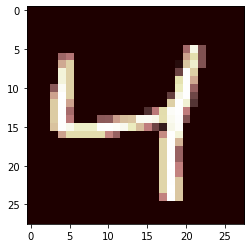

In [6]:
plt.imshow(train_data.data[2], cmap = 'pink')

In [7]:
x = (torch.flatten(train_data.data,start_dim=1)/255).float()
y = train_data.targets

In [8]:
x.shape

torch.Size([60000, 784])

In [9]:
x_2 = (torch.flatten(test_data.data,start_dim=1)/255).float()
y_2 = test_data.targets

In [10]:
x_2.shape

torch.Size([10000, 784])

In [11]:
#input, hidden layer 1,2, output = 784, 256,256, 10 
din, dh_1, dh_2, dout = 784, 256, 256, 10
model = torch.nn.Sequential(
    torch.nn.Linear(din,dh_1),
    torch.nn.ReLU(),
    torch.nn.Linear(dh_1,dh_2),
    torch.nn.ReLU(),
    torch.nn.Linear(dh_2, dout), # pytorch의 CrossEntropyLoss 함수에 softmax가 포함되어 있으므로 Softmax 넣지 않았음

)

In [12]:
learning_rate = 0.01
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)

In [13]:
for epoch in range(200):
    y_pred = model(x)
    loss = criterion(y_pred,y)
    optimizer.zero_grad() # zero_grad(): 미분값 초기화 
    loss.backward() # backpropagation
    optimizer.step() # update weights and biases
   
    prediction = y_pred.max(1)[1]
    corrects = (prediction == y)
    accuracy = corrects.sum().float() / float( y.size(0) )
    print(epoch, loss.item(), accuracy)

0 2.3047053813934326 tensor(0.0842)
1 2.013629674911499 tensor(0.4906)
2 1.3718464374542236 tensor(0.5534)
3 1.5873003005981445 tensor(0.5778)
4 1.661365032196045 tensor(0.5317)
5 0.9266183972358704 tensor(0.6805)
6 0.8025016784667969 tensor(0.7311)
7 0.8323615789413452 tensor(0.6918)
8 0.7631441354751587 tensor(0.7362)
9 0.6252925395965576 tensor(0.8204)
10 0.5283607244491577 tensor(0.8453)
11 0.4907297194004059 tensor(0.8416)
12 0.4720950126647949 tensor(0.8457)
13 0.43878868222236633 tensor(0.8625)
14 0.3949172794818878 tensor(0.8808)
15 0.3697201609611511 tensor(0.8880)
16 0.34909936785697937 tensor(0.8946)
17 0.3343629837036133 tensor(0.9026)
18 0.3284759223461151 tensor(0.9050)
19 0.31071263551712036 tensor(0.9099)
20 0.2878279983997345 tensor(0.9151)
21 0.2672589421272278 tensor(0.9211)
22 0.2533905506134033 tensor(0.9253)
23 0.24842330813407898 tensor(0.9262)
24 0.24037960171699524 tensor(0.9282)
25 0.22525285184383392 tensor(0.9324)
26 0.21068549156188965 tensor(0.9372)
27 0.2

In [14]:
#TEST
with torch.no_grad():
  y_pred2 = model(x_2)
  loss2 = criterion(y_pred2, y_2)

In [15]:
 prediction2 = y_pred2.max(1)[1]

In [16]:
corrects2 = (prediction2 == y_2)
accuracy2 = corrects2.sum().float() / float( y_2.size(0) )
accuracy2 #TEST DATA 정확도 = accuracy2 = 0.9743

tensor(0.9743)